Model and LabelEncoder saved successfully.
Classification Accuracy: 92.39%


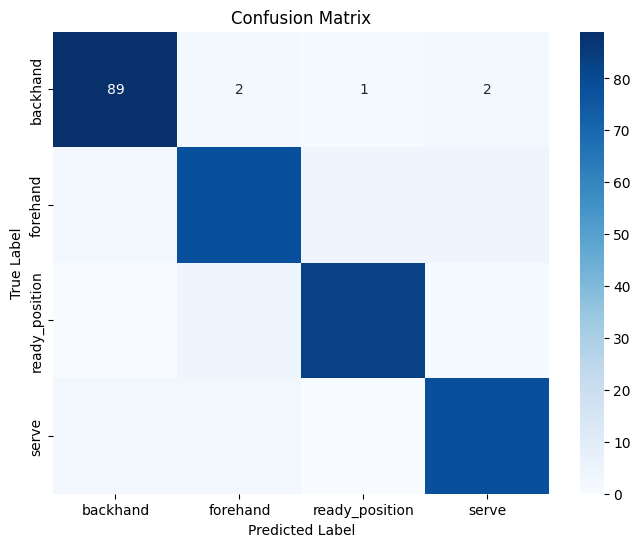

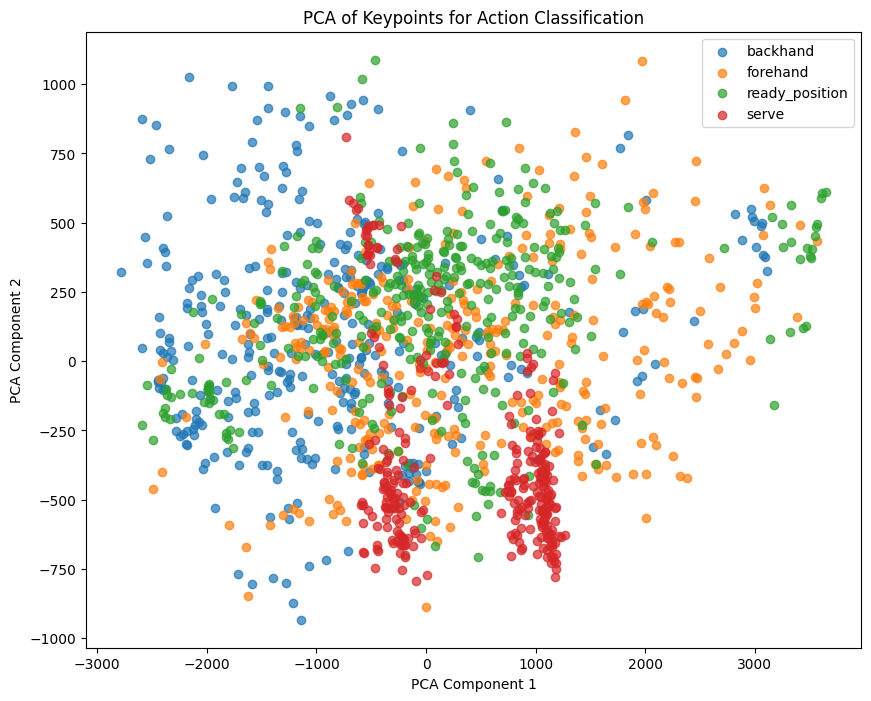

In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Paths to JSON files
json_files = {
    'backhand': r'C:\Users\Istiaque Ahmed\Documents\AIDojo\Keypoint-Based\Final Test\ModelPreparation\backhand.json',
    'forehand': r'C:\Users\Istiaque Ahmed\Documents\AIDojo\Keypoint-Based\Final Test\ModelPreparation\forehand.json',
    'ready_position': r'C:\Users\Istiaque Ahmed\Documents\AIDojo\Keypoint-Based\Final Test\ModelPreparation\ready_position.json',
    'serve': r'C:\Users\Istiaque Ahmed\Documents\AIDojo\Keypoint-Based\Final Test\ModelPreparation\serve.json'
}

# Function to extract keypoints and labels
def extract_keypoints(json_files):
    data = []
    labels = []
    
    for label, json_path in json_files.items():
        with open(json_path) as f:
            json_data = json.load(f)
            for annotation in json_data['annotations']:
                keypoints = annotation['keypoints']
                data.append(keypoints)
                labels.append(label)
    
    return np.array(data), np.array(labels)

# Load keypoints and labels
data, labels = extract_keypoints(json_files)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, encoded_labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Save the trained model and label encoder
joblib.dump(svm_model, 'svm_action_classifier.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Model and LabelEncoder saved successfully.")

# Predict and evaluate
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot PCA components with labels
plt.figure(figsize=(10, 8))
for idx, label in enumerate(np.unique(y_train)):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1], 
                label=label_encoder.inverse_transform([label])[0], alpha=0.7)
plt.legend()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of Keypoints for Action Classification")
plt.show()
